# The interval updating mode

Similarly to the [5 - Memory](5%20-%20Memory.ipynb) notebook, we use `minibn` to implement the *interval* updating mode ([Chatain et al., 2018](https://doi.org/10.1007/978-3-319-92675-9_3),[Paulevé and Sené, 2021](https://doi.org/10.4230/OASIcs.AUTOMATA.2021.10)).

In [1]:
from colomoto.minibn import *

The interval updating mode has no parameter. We use the notations of Def.10 of ([Paulevé and Sené, 2021](https://doi.org/10.4230/OASIcs.AUTOMATA.2021.10)).

In [2]:
class IntervalDynamics(UpdateModeDynamics):
    def __call__(self, x):
        
        # translating dictionnary to tuples
        def e(x):
            return tuple((x[i] for i in self.nodes))
        def E(ex):
            return dict(zip(self.nodes, ex))
        def f(ex):
            return e(self.model(E(ex)))

        def Phi(L, X):
            Y = set()
            J = set(range(self.n)).difference(L)
            if not J: return Y
            for x in X:
                y = f(x)
                I = (i for i in J if y[i] != x[i])
                for i in I:
                    Y.update(Phi_i(L, i, x))
            return Y
        def Phi_omega(L, X):
            Y = set()
            while X:
                Y.update(X)
                X = Phi(L, X)
                X = X.difference(Y)
            return Y
        def flip(x, i):
            z = list(x)
            z[i] = 1-z[i]
            return tuple(z)
        def Phi_i(L, i, x):
            L = L.union({i})
            return {flip(y, i) for y in Phi_omega(L, {x})}
        
        for y in Phi(set(), {e(x)}):
            yield E(y)

In [3]:
f = BooleanNetwork({
    "x1": "!x3",
    "x2": "!x1 & x3",
    "x3": "!x1",
})
f

x1 <- !x3
x2 <- !x1&x3
x3 <- !x1

The following code reproduces Fig 3(center) of ([Paulevé and Sené, 2021](https://doi.org/10.4230/OASIcs.AUTOMATA.2021.10)):

# computing graph layout...


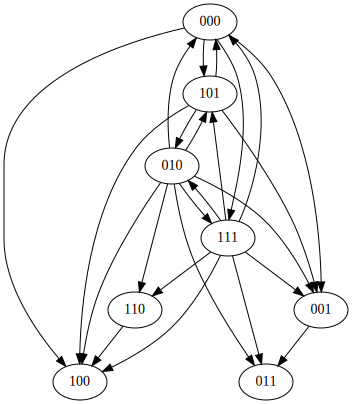

In [4]:
ui = IntervalDynamics(f).dynamics()
ui

The interval dynamics can be strictly larger that the (general) asynchronous one. This is the case of the above example, where the following transitions are not captured by the general asynchronous dynamics:

In [5]:
set(ui.edges()).difference(GeneralAsynchronousDynamics(f).dynamics().edges())

{('000', '111'), ('101', '010')}